# Calculating the type of a star based on its luminosity and temperature
## By Rohan Arni

This project takes in a dataset of stars, their magnitude, and temperature and classifies them into different types of stars. The data is from a [Kaggle](https://www.kaggle.com/datasets/deepu1109/star-dataset) dateset, and the project uses linear regression for the analysis.

### 1) Import all the necessary libraries.

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

### 2) Read the star data from the CSV file

In [44]:
data = pd.read_csv('data.csv')
x = data['Temperature (K)'].values
y = data['Absolute magnitude(Mv)'].values
z = data['Star type'].values

### 3) Build a visual 3D graph to see the data. <br> 
Not necessary, but it helps to understand the data better. The X and Y are switched to help viewing angles.

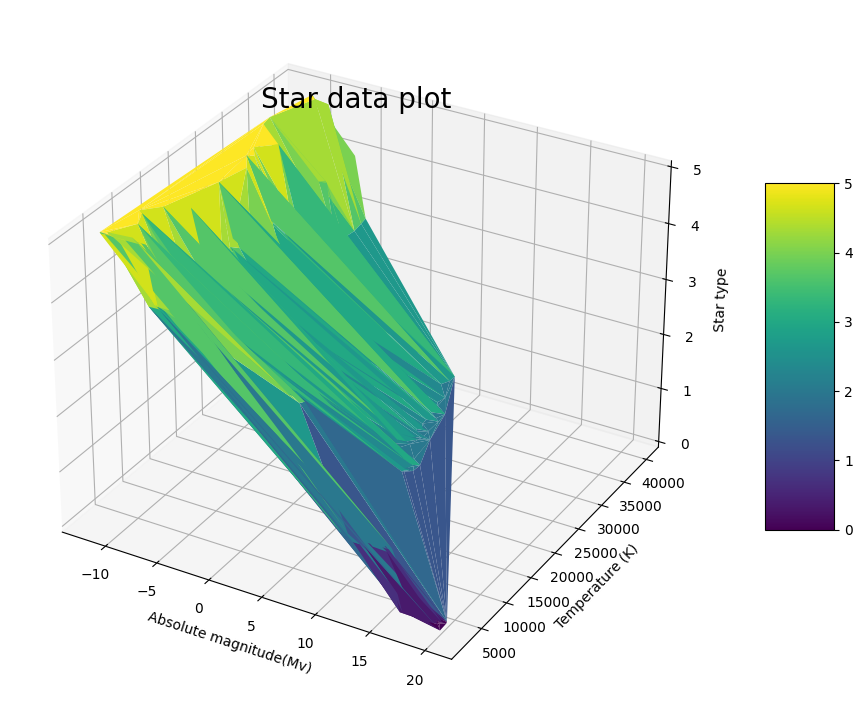

In [45]:
fig = plt.figure(figsize=(16, 9))
ax = plt.axes(projection='3d')
ax.set_ylabel('Temperature (K)')
ax.set_xlabel('Absolute magnitude(Mv)')
ax.set_zlabel('Star type')
ax.set_title('Star data plot', fontsize=20, y=0.92)

tri_graph = ax.plot_trisurf(y, x, z, cmap='viridis', edgecolor='none')
fig.colorbar(tri_graph, ax=ax, shrink=0.5, aspect=5)

### 4) Create a linear regression model from the star data. <br>
This model will be used to predict the type of star based on its magnitude and temperature.

In [46]:
model = linear_model.LinearRegression()
model.fit(data[['Temperature (K)', 'Absolute magnitude(Mv)']].values, data[['Star type']].values)

LinearRegression()

### 5) Graph the plane of best fit using the linear regression coefficients and intercept. <br> 
This is the plane that separates the stars into different types. The X and Y are switched to help viewing angles.

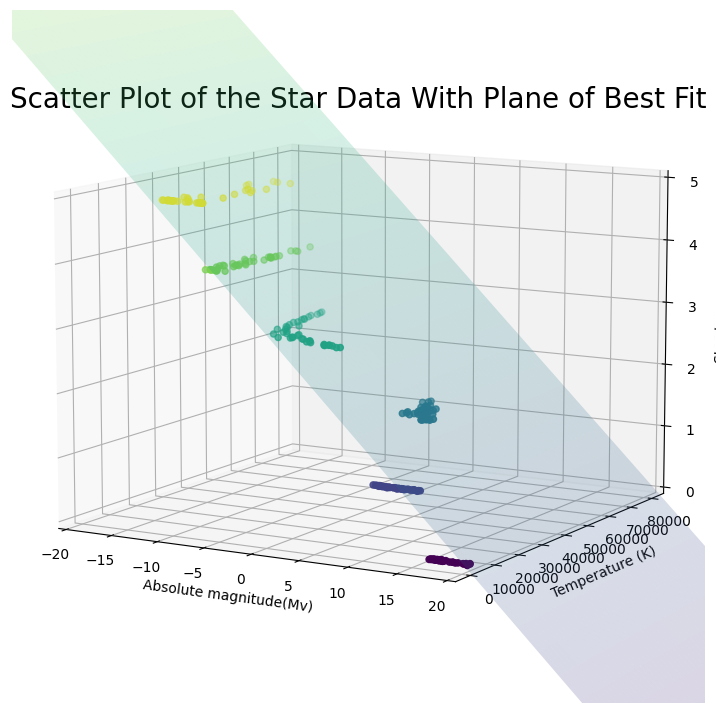

In [47]:
x_val = np.linspace(0,80000,50)
y_val = np.linspace(-50,50,50)
x_plane, y_plane = np.meshgrid(x_val, y_val)
z_plane = model.coef_[0][0]*x_plane + model.coef_[0][1]*y_plane + model.intercept_[0]

fig2 = plt.figure(figsize=(16, 9))
ax2 = plt.axes(projection='3d')
ax2.set_ylabel('Temperature (K)')
ax2.set_xlabel('Absolute magnitude(Mv)')
ax2.set_xlim3d(-20, 20)
ax2.set_zlabel('Star type')
ax2.set_zlim3d(0, 5)
ax2.view_init(elev=10)

ax2.set_title('Scatter Plot of the Star Data With Plane of Best Fit', fontsize=20, y=0.92)

ax2.scatter3D(y, x, z, c=z, cmap='viridis')
ax2.plot_surface(y_plane, x_plane, z_plane, alpha=0.2, cmap='viridis')


### 6) Use the new regression model to predict the type of star for a given temperature and magnitude <br>
The function returns a value between 0 and 5, which corresponds to the type of star.  (0 = Brown Dwarf, 1 = Red Dwarf, 2 = White Dwarf, 3 = Main
Sequence, 4 = Supergiant, 5 = Hypergiant)<br> 0.2 is added to the model prediction to account for the inaccuracy of the data set. 

In [48]:
sun = (model.predict([[6000, 4.83]]) + 0.2)[0][0]
print('Predicted star type:', sun)

Predicted star type: 2.621424478337227


### 7) Graph the predicted type of star (the sun for our example) for a given temperature and magnitude <br>    
The sun is a main sequence star (3), which is what our model approximately predicted. 

Text(4.83, 6000, 'Sun')

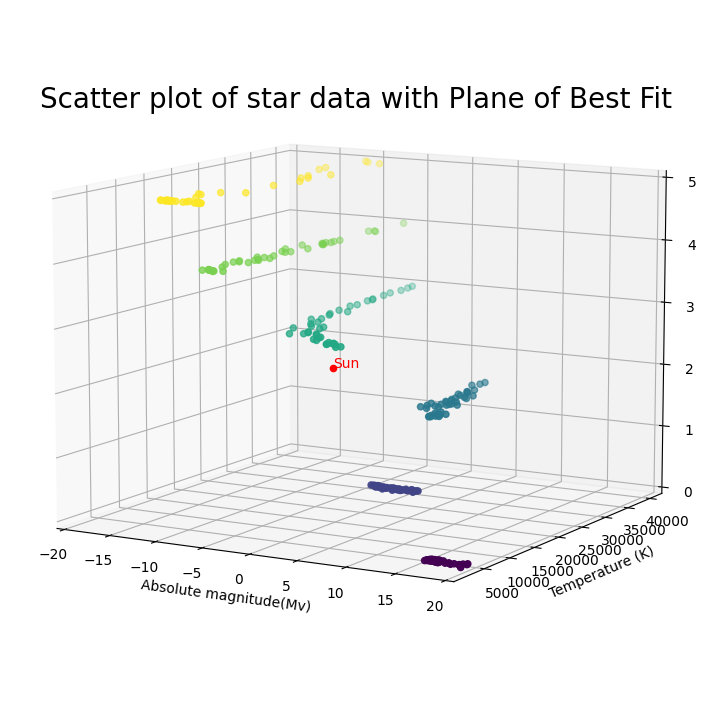

In [49]:
fig2 = plt.figure(figsize=(16,9))
ax3 = plt.axes(projection='3d')
ax3.set_ylabel('Temperature (K)')
ax3.set_xlabel('Absolute magnitude(Mv)')
ax3.set_xlim3d(-20, 20)
ax3.set_zlabel('Star type')
ax3.set_zlim3d(0, 5)
ax3.view_init(elev=10)
ax3.set_title('Scatter plot of star data with Plane of Best Fit', fontsize=20, y=0.92)
ax3.scatter3D(y, x, z, c=z, cmap='viridis')

#graph the calculated sun
ax3.scatter3D(4.83, 6000, sun, c='red')
ax3.text(4.83, 6000, sun, 'Sun', color='red')